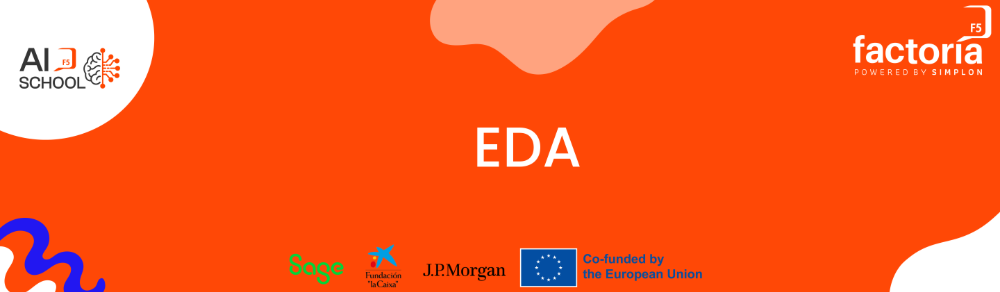

#Justificación y Fundamentos



Este proyecto surge del interés por explorar la distribución de los grupos sanguíneos humanos a nivel global. Los tipos de sangre no son solo un dato médico; son un reflejo de nuestra historia genética y de los patrones de migración a lo largo de milenios. El análisis de su prevalencia en diferentes regiones nos permite inferir conexiones históricas y antropológicas que van más allá de los datos superficiales.

##**1. Configuración**



In [446]:
!pip install pandas geopandas folium

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
import matplotlib.colors as mcolors
from scipy import stats
import missingno as msno



In [448]:
# Establece el estilo de los gráficos de Seaborn
sns.set_style("whitegrid")

##**2. Cargar y verificar los datos**

1. Grupo Sanguineo por pais:

  Fuente de datos:
- Origen: Dataset 'bloodtypes.csv'
- Contenido: Distribución mundial de tipos de sangre
- URL de origen: [https://www.kaggle.com/datasets/kamilenovaes/global-blood-type-distribution]

In [449]:
# Datos existentes en la tabla
df = pd.read_csv('bloodtypes.csv')
display(df.head())

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.1,31.20,14.5,5.20,6.0,5.50,2.6,0.90
1,Algeria,43576691,40.0,30.00,15.0,4.25,6.6,2.30,1.1,0.75
2,Argentina,45479118,48.9,31.54,8.0,2.45,4.9,3.16,0.8,0.25
3,Armenia,3021324,29.0,46.30,12.0,5.60,2.0,3.70,1.0,0.40
4,Australia,25466459,38.0,32.00,12.0,4.00,7.0,6.00,2.0,1.00


In [450]:
# Verificar dimensiones
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 126 filas y 10 columnas


In [451]:
#Información y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     126 non-null    object 
 1   Population  126 non-null    int64  
 2   O+          126 non-null    float64
 3   A+          126 non-null    float64
 4   B+          126 non-null    float64
 5   AB+         126 non-null    float64
 6   O-          125 non-null    float64
 7   A-          125 non-null    float64
 8   B-          125 non-null    float64
 9   AB-         125 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.0+ KB


2. Limites geograficos



Fuente de datos:
- Origen: Archivo GeoJSON 'countries.geojson'
- Contenido: Geometría (formas, límites y coordenadas) de los países del mundo.
- URL de origen: https://raw.githubusercontent.com/datasets/geo-countries/main/data/countries.geojson


In [452]:
# Cargar el archivo GeoJSON de límites de países
gdf_world = gpd.read_file('countries.geojson')

In [453]:
# Análisis y visualización
print(gdf_world.head())

        name ISO3166-1-Alpha-3 ISO3166-1-Alpha-2  \
0  Indonesia               IDN                ID   
1   Malaysia               MYS                MY   
2      Chile               CHL                CL   
3    Bolivia               BOL                BO   
4       Peru               PER                PE   

                                            geometry  
0  MULTIPOLYGON (((117.70361 4.16342, 117.70361 4...  
1  MULTIPOLYGON (((117.70361 4.16342, 117.69711 4...  
2  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...  
3  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...  
4  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...  


In [454]:
#Información del DataFrame y tipos de datos
gdf_world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               258 non-null    object  
 1   ISO3166-1-Alpha-3  258 non-null    object  
 2   ISO3166-1-Alpha-2  258 non-null    object  
 3   geometry           258 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 8.2+ KB


In [455]:
# Verificar dimensiones
print(f"El dataset tiene {gdf_world.shape[0]} filas y {gdf_world.shape[1]} columnas")

El dataset tiene 258 filas y 4 columnas


In [456]:
#Estadisticas resumidas de la columna
gdf_world.describe()

,name,ISO3166-1-Alpha-3,ISO3166-1-Alpha-2,geometry
count,258,258,258,258
unique,258,237,237,258
top,Scarborough Reef,-99,-99,"MULTIPOLYGON (((-69.510089 -17.506588, -69.506..."
freq,1,22,22,1


##**3. Valores faltantes**

 3.1 Tabla de Grupos sanguineos:

In [457]:
# Cantidad de valores faltantes por columna
print(df.isnull().sum())

Country       0
Population    0
O+            0
A+            0
B+            0
AB+           0
O-            1
A-            1
B-            1
AB-           1
dtype: int64


Cuenta con valores nulos en la siguiente columnas:  0-, A-, B- y AB-


In [458]:
# Porcentaje
print((df.isnull().sum() / len(df)) * 100)

Country       0.000000
Population    0.000000
O+            0.000000
A+            0.000000
B+            0.000000
AB+           0.000000
O-            0.793651
A-            0.793651
B-            0.793651
AB-           0.793651
dtype: float64


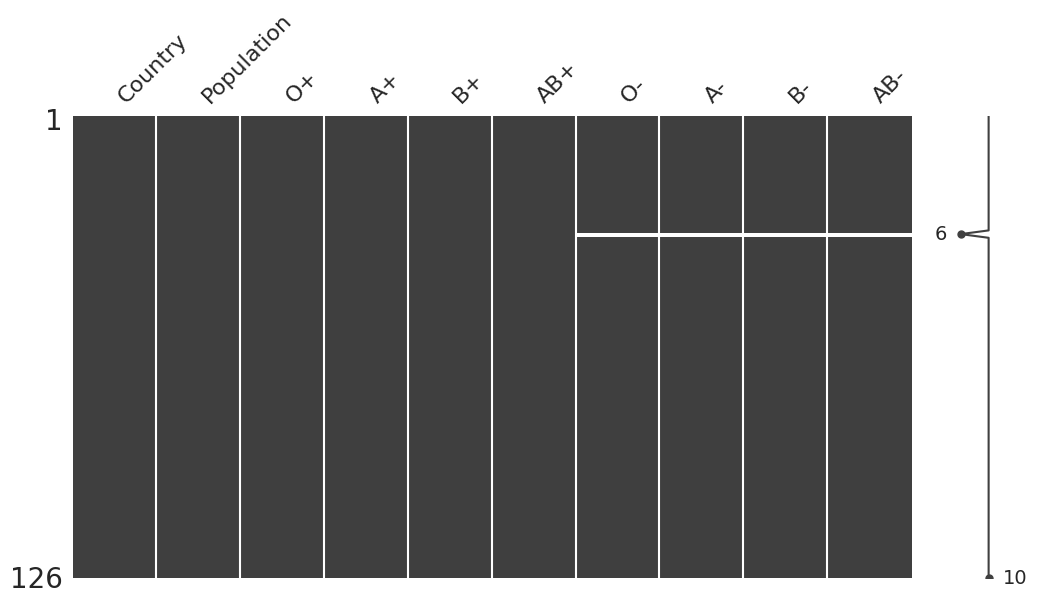

In [459]:
# Visualización
msno.matrix(df, figsize=(12,6))
plt.show()

**Manejo de valores nulos:**  La estrategia adoptada es  de rellenarlos con la media de cada columna, ya que la cantidad de valores ausentes es pequeña (menos del 1%). Esto te permitirá usar todos tus datos en análisis posteriores.

3.2 Tabla de Paises

In [460]:
# Conteo de nulos
print(gdf_world.isnull().sum())

name                 0
ISO3166-1-Alpha-3    0
ISO3166-1-Alpha-2    0
geometry             0
dtype: int64


No cuenta con valores nulos.

## **4. Limpieza y Preprocesamiento de datos**

In [461]:
# 1. Manejo de valores nulos
columnas_grupos_sanguineos = [
    'O+', 'A+', 'B+', 'AB+',
    'O-', 'A-', 'B-', 'AB-'
]


In [462]:
# 2. Rellenar los valores nulos de las columnas seleccionadas con la media de cada una
for col in columnas_grupos_sanguineos:
    media_columna = df[col].mean()
    df[col] = df[col].fillna(media_columna)

In [463]:
# 3. Verificar que ya no hay valores nulos
print("\nVerificación de valores nulos después de rellenar:")
print(df.isnull().sum())


Verificación de valores nulos después de rellenar:
Country       0
Population    0
O+            0
A+            0
B+            0
AB+           0
O-            0
A-            0
B-            0
AB-           0
dtype: int64


Todos los valores ausentes fueron reemplazados.

## **5. Análisis Univariado y Descriptivo**

In [464]:
print("\nEstadísticas Descriptivas de los Porcentajes de Grupos Sanguíneos:")
print(df[columnas_grupos_sanguineos].describe())


Estadísticas Descriptivas de los Porcentajes de Grupos Sanguíneos:
               O+          A+          B+         AB+          O-          A-  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean    40.351190   29.665079   16.403413    4.827143    3.916720    3.277200   
std      9.991809    6.351653    7.564090    2.543609    2.521823    2.494458   
min     25.500000   14.000000    4.720000    0.500000    0.060000    0.040000   
25%     32.075000   25.817500   10.000000    2.925000    1.792500    1.000000   
50%     38.175000   30.000000   15.000000    4.295000    3.958360    2.715000   
75%     46.822500   34.850000   21.235000    6.300000    6.000000    6.000000   
max     75.000000   46.300000   36.800000   14.700000   13.000000    8.000000   

              B-         AB-  
count  126.00000  126.000000  
mean     1.33440    0.496320  
std      0.85834    0.380414  
min      0.01000    0.010000  
25%      0.55500    0.152500  
50%      1.27500

5.1 Visualización de la Distribución (Histogramas y Diagramas de Caja)

In [465]:
# Itera sobre las columnas para generar gráficos para cada grupo sanguíneo
columnas_grupos_sanguineos = [
    'O+', 'A+', 'B+', 'AB+',
    'O-', 'A-', 'B-', 'AB-'
]


Visualizando la Distribución (Histogramas):


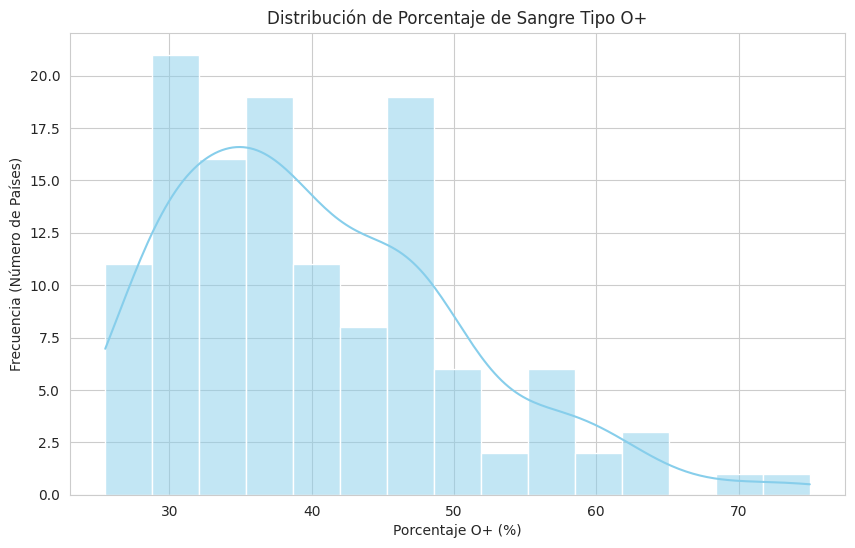


Detectando Outliers:


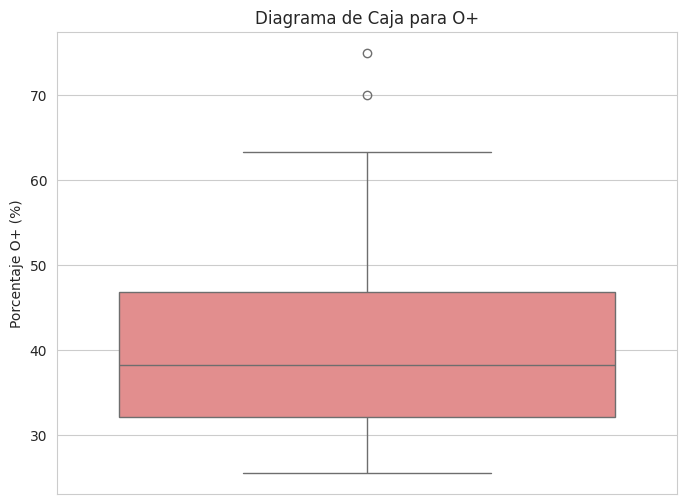


Visualizando la Distribución (Histogramas):


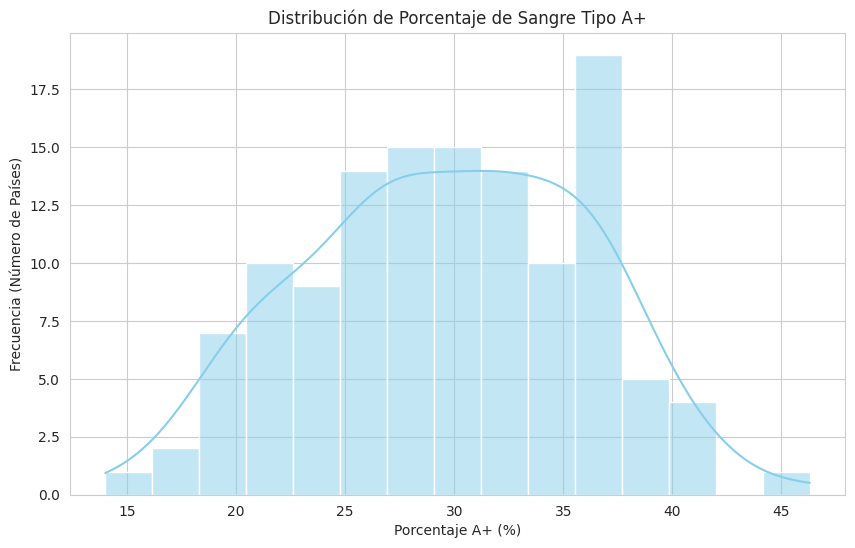


Detectando Outliers:


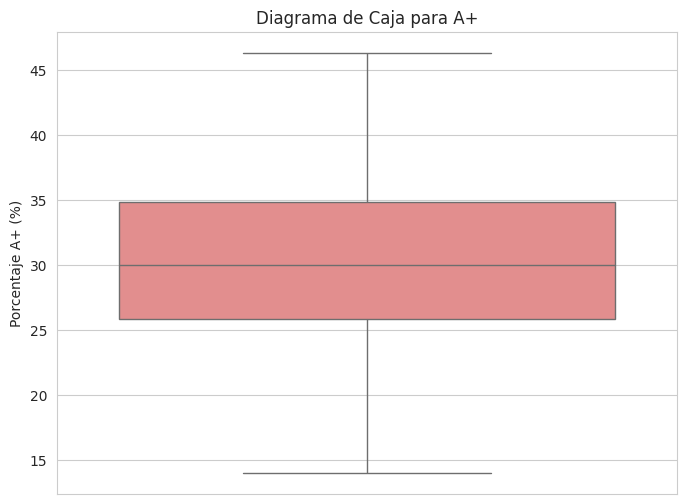


Visualizando la Distribución (Histogramas):


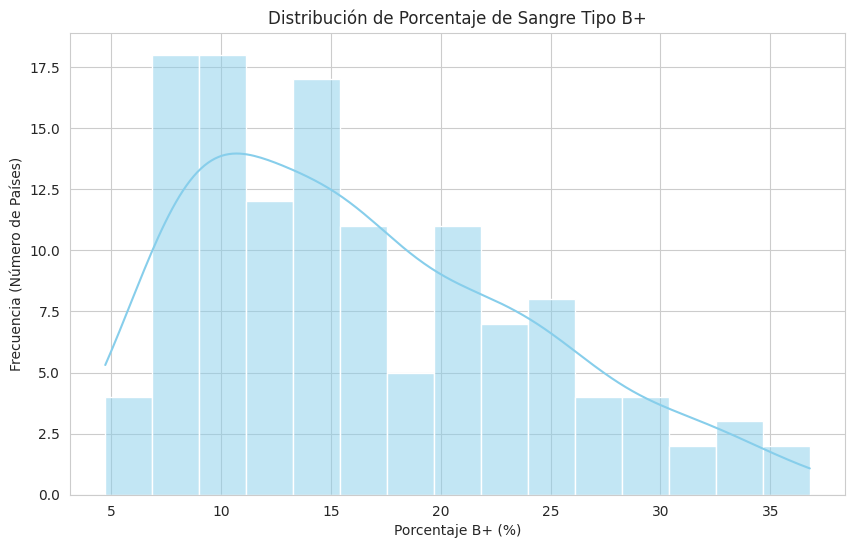


Detectando Outliers:


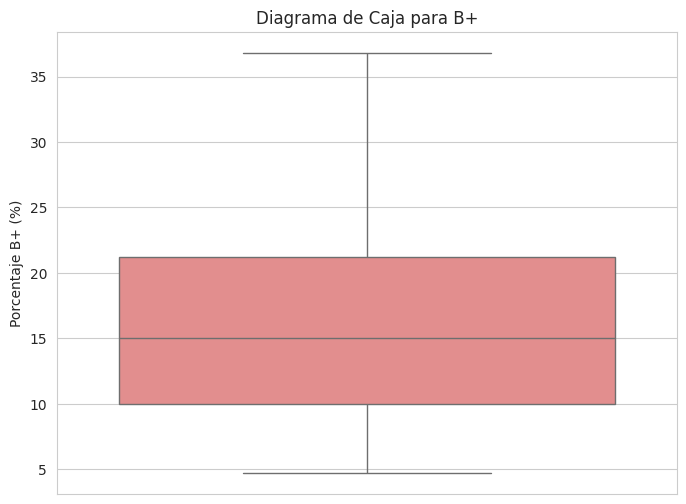


Visualizando la Distribución (Histogramas):


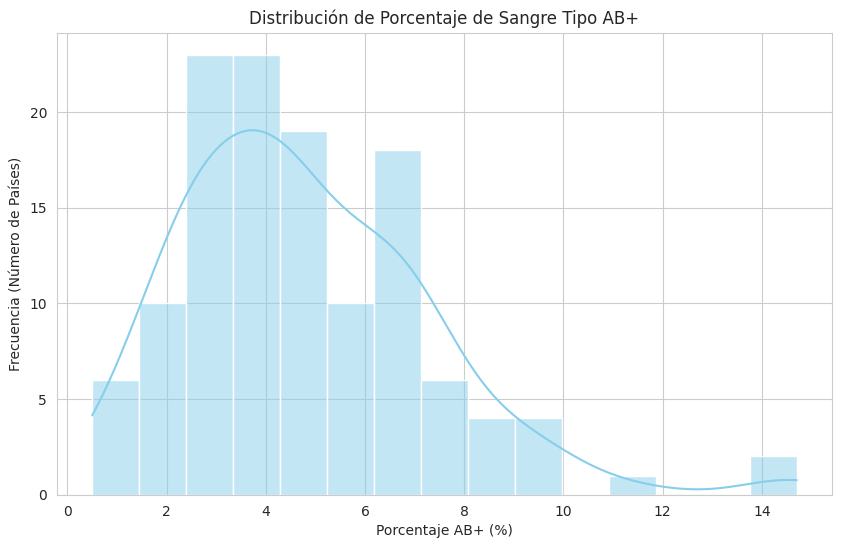


Detectando Outliers:


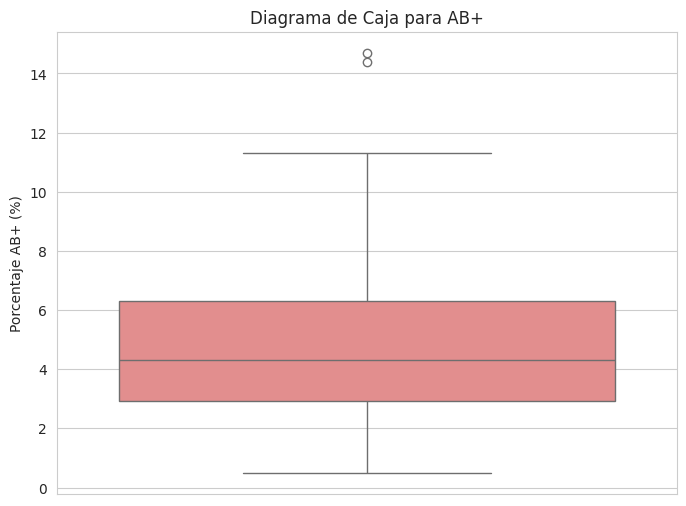


Visualizando la Distribución (Histogramas):


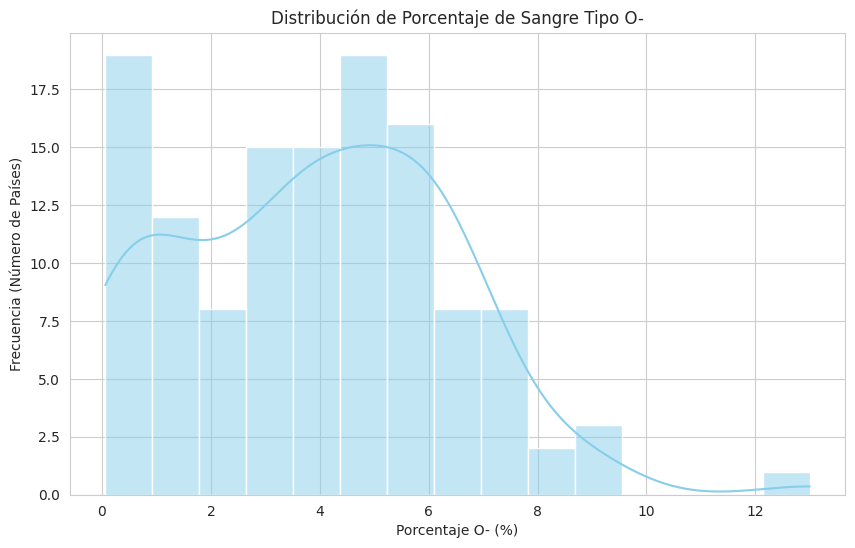


Detectando Outliers:


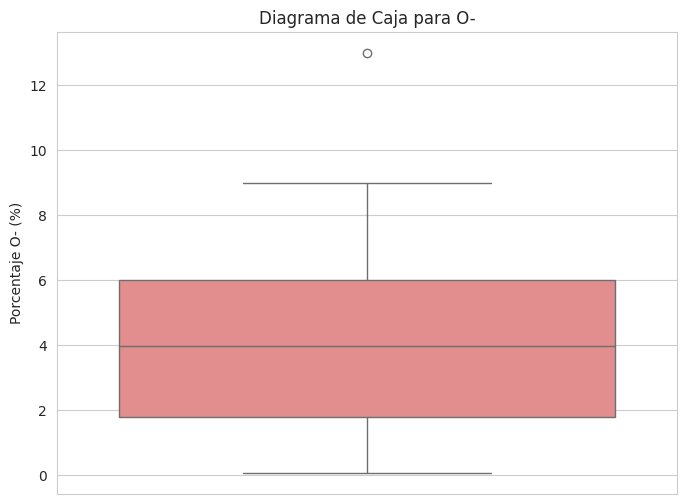


Visualizando la Distribución (Histogramas):


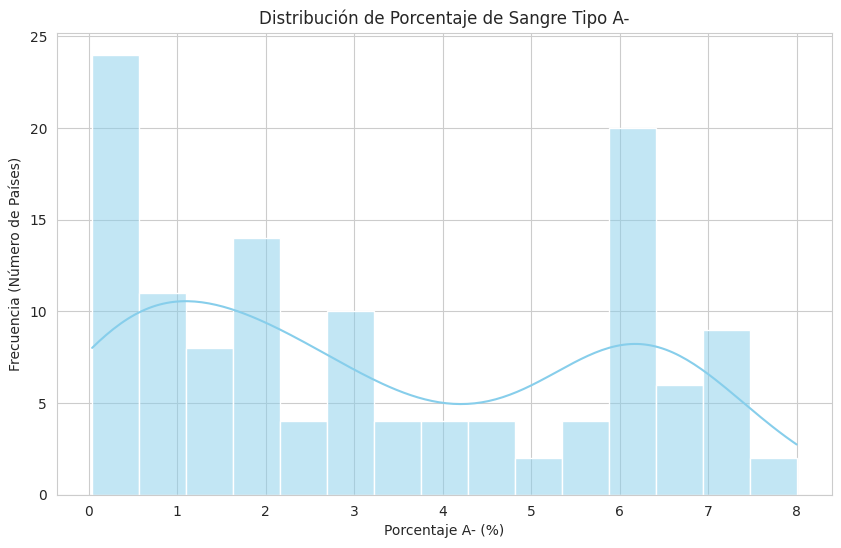


Detectando Outliers:


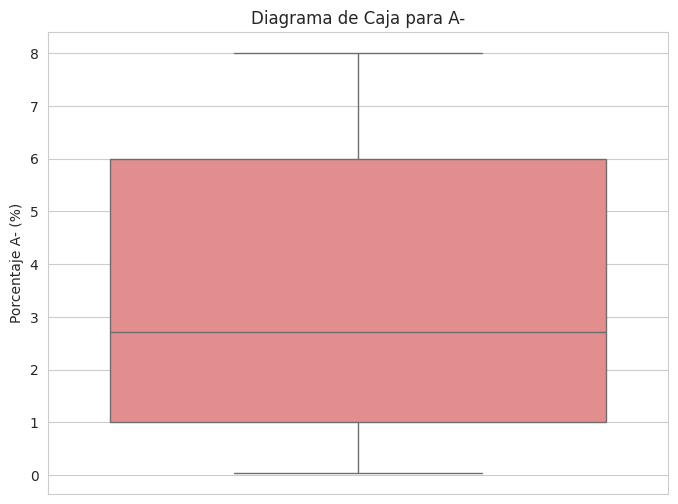


Visualizando la Distribución (Histogramas):


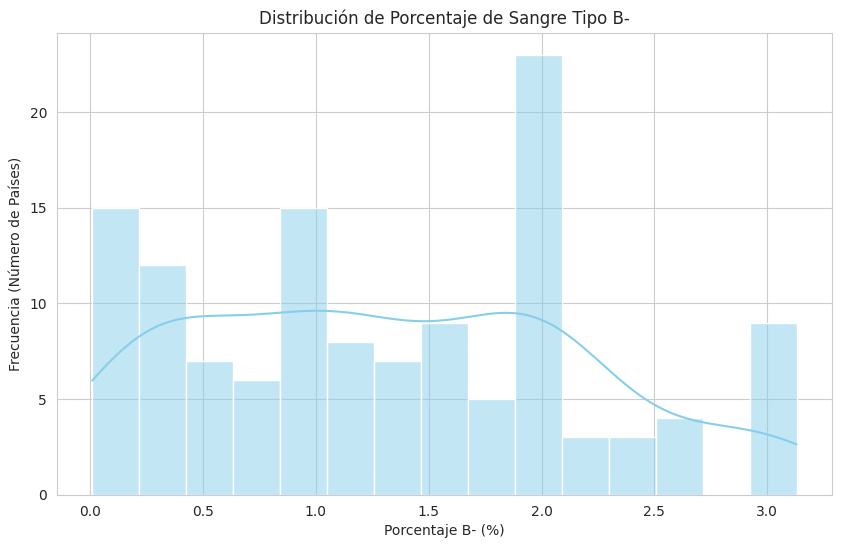


Detectando Outliers:


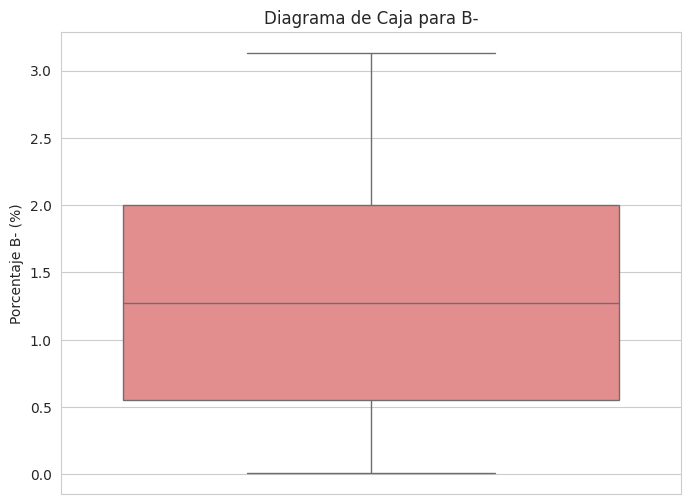


Visualizando la Distribución (Histogramas):


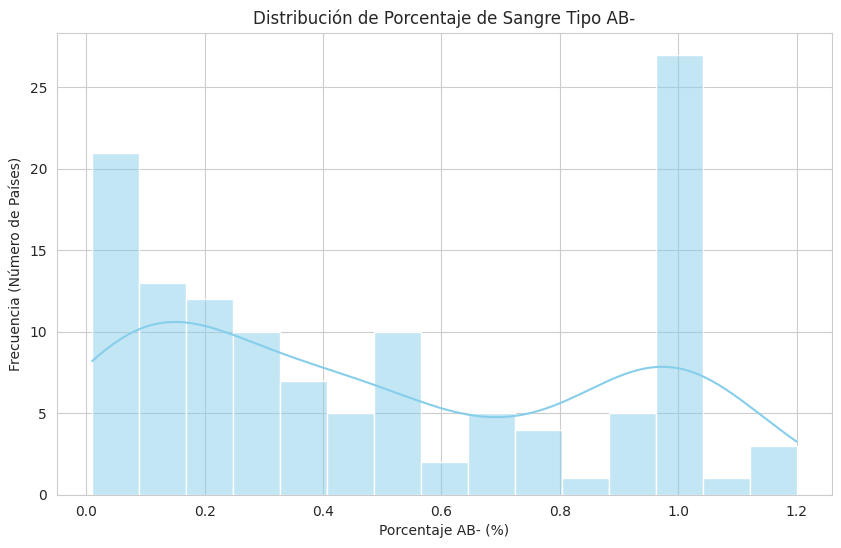


Detectando Outliers:


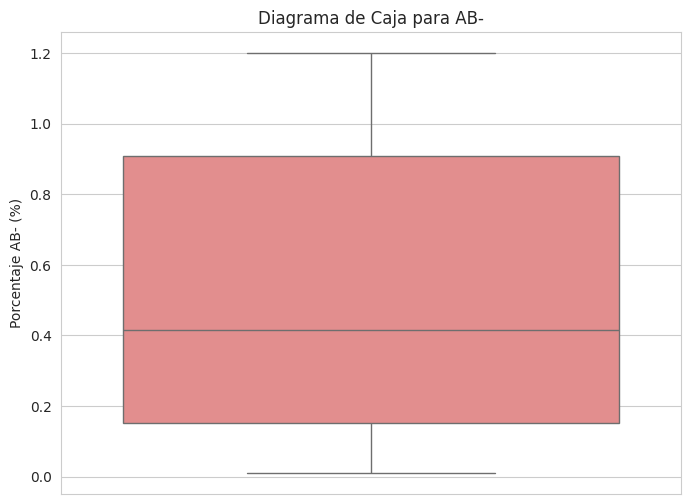

In [466]:
for col in columnas_grupos_sanguineos:
    # Histograma
    print("\nVisualizando la Distribución (Histogramas):")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, bins=15, kde=True, color='skyblue')
    plt.title(f'Distribución de Porcentaje de Sangre Tipo {col}')
    plt.xlabel(f'Porcentaje {col} (%)')
    plt.ylabel('Frecuencia (Número de Países)')
    plt.show()

    # Diagrama de Caja
    print("\nDetectando Outliers:")
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Diagrama de Caja para {col}')
    plt.ylabel(f'Porcentaje {col} (%)')
    plt.show()

##**6. Análisis Bivariado y Multivariado**





El objetivo es agrupar los países basándose en la similitud de su distribución de grupos sanguíneos. Es decir, en lugar de analizar un país a la vez, el análisis de clústeres te permite identificar qué países son genéticamente "similares" entre sí en cuanto a sus grupos sanguíneos.

6.1 Grupo sanguineo: Preparacion de datos

In [467]:
df_correlacion = df[columnas_grupos_sanguineos]


Visualizando la Matriz de Correlación:


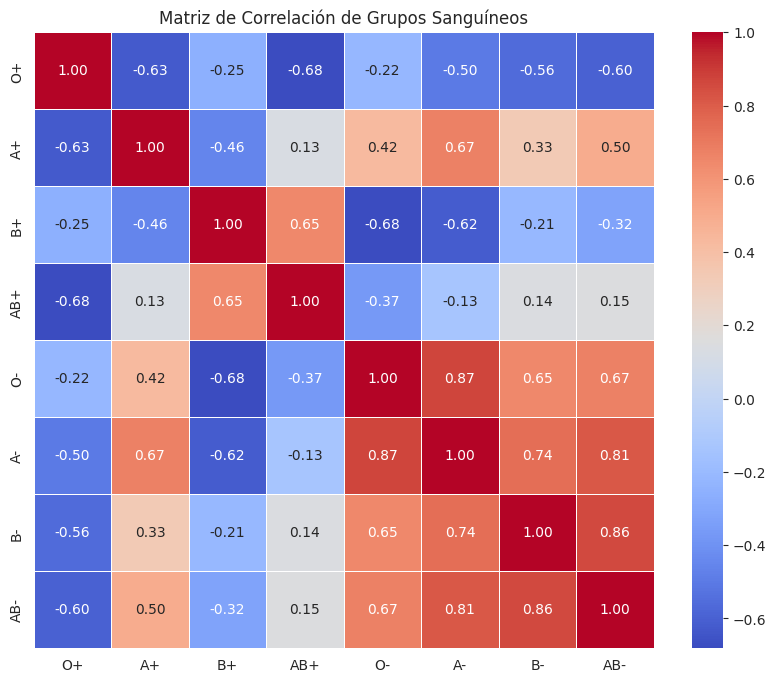

In [468]:
print("\nVisualizando la Matriz de Correlación:")
correlacion_matriz = df[columnas_grupos_sanguineos].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Grupos Sanguíneos')
plt.show()

6.2 Análisis de Clústeres (k-Means)


In [469]:
# Prepara los datos para el clustering
df_clustering = df[columnas_grupos_sanguineos].copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

In [470]:
k = 4 # Número de clústeres a formar
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

In [471]:
# Unir los resultados del clúster con los datos geográficos
gdf_merged = gdf_world.merge(df, left_on='name', right_on='Country', how='left')

##**7. Visualizacion de los clústeres**





7.1 Visualizacion geografica

In [472]:
# Simplifica la geometría de los países para un cálculo del centroide más preciso
gdf_merged['geometry'] = gdf_merged['geometry'].simplify(0.05, preserve_topology=True)

In [473]:
# Preparar la paleta de colores y la leyenda

# Obtener el número único de clústeres
num_clusters = gdf_merged['Cluster'].nunique()

In [474]:
# Preparar la paleta de colores y la leyenda
colores_personalizados = {
    0: '#a6cee3',  # Clúster 0
    1: '#1f78b4',  # Clúster 1
    2: '#b2df8a',  # Clúster 2
    3: '#33a02c',  # Clúster 3

}

In [475]:
# Create a dictionary to assign a color to each cluster
cluster_colors = colores_personalizados

In [476]:
# Crear el mapa base con Folium
m = folium.Map(location=[0, 0], zoom_start=2, tiles='CartoDB Voyager')


In [477]:
# Función de estilo para colorear los clústeres
def style_function(feature):
    cluster_id = feature['properties']['Cluster']
    if pd.isna(cluster_id):
        return {'fillColor': '#D3D3D3', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.7}
    else:
        # Asegura que el valor del clúster sea un entero para el diccionario
        return {'fillColor': colores_personalizados[int(cluster_id)], 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.8}


In [478]:
# Agrega la capa GeoJson con la función de estilo personalizada
geojson_layer = folium.GeoJson(
    gdf_merged,
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['name', 'Cluster'] + columnas_grupos_sanguineos,
        aliases=['País', 'Clúster'] + [f'Porcentaje {col}' for col in columnas_grupos_sanguineos],
        localize=True,
        sticky=False,
        labels=True,
        max_width='300px'
    )
).add_to(m)

In [479]:
# 6. Agregar leyenda
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 150px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; opacity:0.9;">
       &nbsp; <b>Clústeres de Países</b> <br>
       '''
for cluster_id, color in colores_personalizados.items():
    if cluster_id in df['Cluster'].unique():
        cluster_profile = df[df['Cluster'] == cluster_id][columnas_grupos_sanguineos].mean()
        description = f"O+: {cluster_profile['O+']:.1f}%"
    else:
        description = "Sin datos"

    legend_html += f'&nbsp; <i style="background:{color}; color:{color};">___</i>&nbsp; Clúster {int(cluster_id)} <br>'
legend_html += '&nbsp; <i style="background:#D3D3D3; color:#D3D3D3;">___</i>&nbsp; Países sin datos<br>'
legend_html += '</div>'

m.get_root().add_child(folium.Element(legend_html))

# Muestra el mapa
m

7.2 Gráfico de Barras de Distribución Global

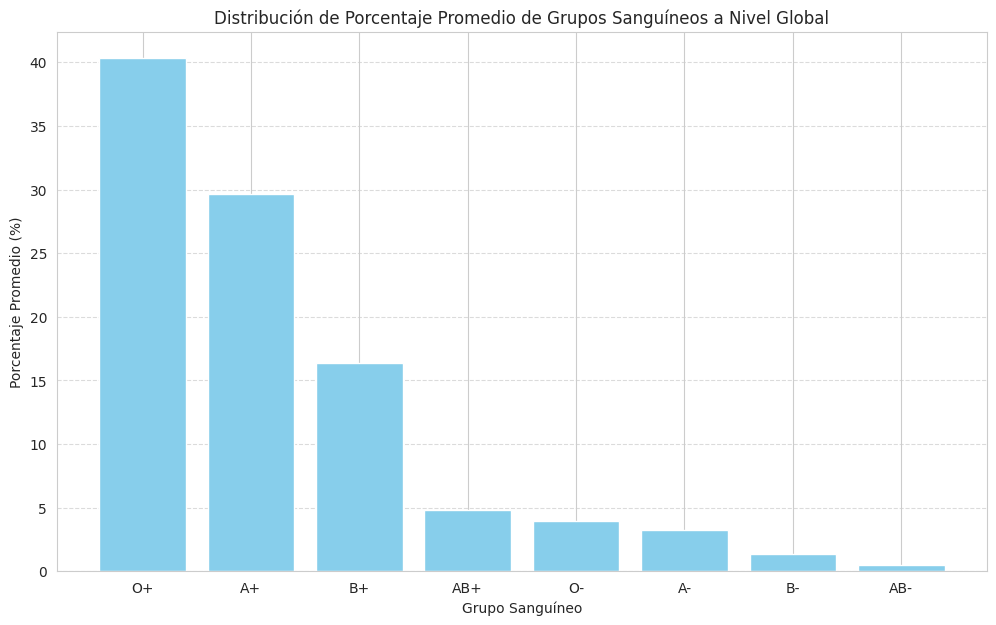

In [480]:
import matplotlib.pyplot as plt

promedios_grupos = df[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].mean()

plt.figure(figsize=(12, 7))
plt.bar(x=promedios_grupos.index, height=promedios_grupos.values, color='skyblue')

plt.title('Distribución de Porcentaje Promedio de Grupos Sanguíneos a Nivel Global')
plt.xlabel('Grupo Sanguíneo')
plt.ylabel('Porcentaje Promedio (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

7.3 Diagrama de Dispersión

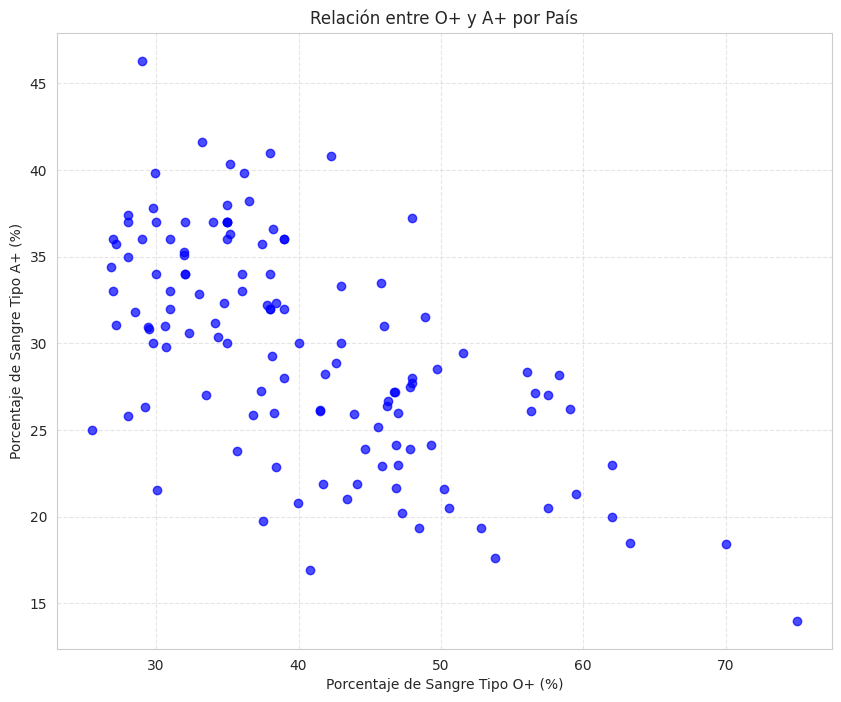

In [481]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x=df['O+'], y=df['A+'], alpha=0.7, color='blue')

plt.title('Relación entre O+ y A+ por País')
plt.xlabel('Porcentaje de Sangre Tipo O+ (%)')
plt.ylabel('Porcentaje de Sangre Tipo A+ (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

7.4 Factor RH:

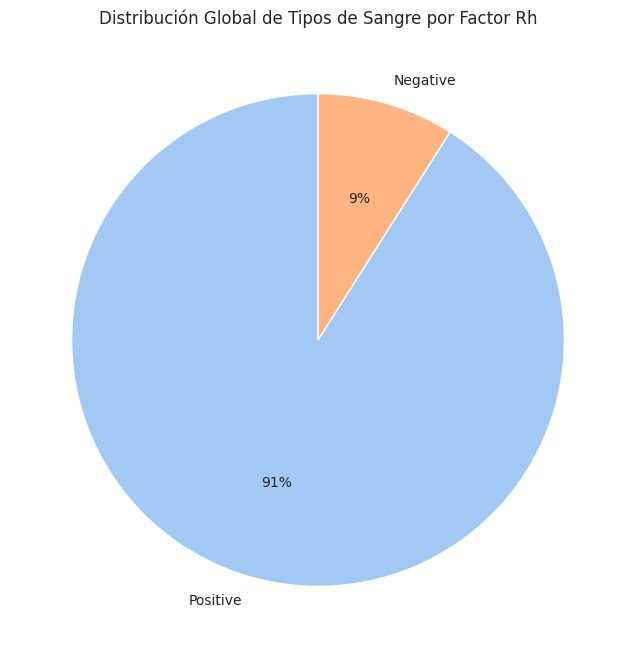

In [482]:
# Sumar los porcentajes de los tipos positivos y negativos en todo el DataFrame
total_pos = df['O+'].sum() + df['A+'].sum() + df['B+'].sum() + df['AB+'].sum()
total_neg = df['O-'].sum() + df['A-'].sum() + df['B-'].sum() + df['AB-'].sum()

total_by_pop = [total_pos, total_neg]
labels = ['Positive', 'Negative']

# Definir la paleta de colores
colors = sns.color_palette('pastel')[0:2]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(total_by_pop, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)
plt.title('Distribución Global de Tipos de Sangre por Factor Rh')
plt.show()



##**8. Pruebas de Hipótesis**

In [483]:
# Ejemplo de prueba t de Student para comparar el porcentaje de B+ entre dos clústeres
print("\nRealizando una Prueba de Hipótesis:")


Realizando una Prueba de Hipótesis:


In [484]:
# Comparar
cluster0_data = df[df['Cluster'] == 0]['B+']
cluster1_data = df[df['Cluster'] == 1]['B+']

t_stat, p_value = stats.ttest_ind(cluster0_data, cluster1_data, equal_var=False)

print(f"Comparando Clúster 0 y Clúster 1 para el grupo sanguíneo B+")
print(f"Estadística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("El valor p es menor que alpha. Rechazamos la hipótesis nula.")
    print("Hay una diferencia significativa en la media de B+ entre los dos clústeres.")
else:
    print("El valor p es mayor que alpha. No podemos rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la media de B+ entre los dos clústeres.")

Comparando Clúster 0 y Clúster 1 para el grupo sanguíneo B+
Estadística t: 17.9231
Valor p: 0.0000
El valor p es menor que alpha. Rechazamos la hipótesis nula.
Hay una diferencia significativa en la media de B+ entre los dos clústeres.


##**9. Resumen**

In [485]:
print("\n=== RESUMEN DE HALLAZGOS ===")

# 1. Calidad de los datos
print("\n1. CALIDAD DE DATOS: ")
print("\n - Porcentaje inicial de valores faltantes en variables clave: 0.79%")
print("\n - Se imputaron los valores nulos con la media de cada columna, lo que resultó en un dataset sin datos faltantes.\n")

# 2. Distribuciones
print("\n2. DISTRIBUCIONES: \n")
print("- Variables con mayor asimetría:")
# Calcula la asimetría (skew) de las variables
asimetria = df[columnas_grupos_sanguineos].skew().sort_values(ascending=False)
print(asimetria.head())

# 3. Outliers
print("\n3. OUTLIERS:")
for col in columnas_grupos_sanguineos:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"- {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# 4. Correlaciones
print("\n4. CORRELACIONES: \n")
print("Correlaciones más fuertes:")
# Calcula la matriz de correlación
matriz_correlacion = df[columnas_grupos_sanguineos].corr()
# Filtra las correlaciones más fuertes (valores absolutos > 0.5)
correlaciones_fuertes = matriz_correlacion[abs(matriz_correlacion) > 0.5]
# Muestra solo las correlaciones fuertes
print(correlaciones_fuertes)

# 5. Hallazgos del análisis de clústeres y recomendaciones
print("\n5. ANÁLISIS DE CLÚSTERES Y RECOMENDACIONES:\n")
print(" - El análisis de clústeres reveló la formación de grupos de países con distribuciones de grupos sanguíneos similares, lo que sugiere patrones genéticos regionales.")
print("\n  - Los perfiles promedio de cada clúster son:")
print(df.groupby('Cluster')[columnas_grupos_sanguineos].mean())
print("\n- **Recomendaciones para pasos siguientes:**\n")
print("  - Investigar los países que son considerados outliers para entender si son excepciones genéticas o errores en los datos.")
print("  - Validar las diferencias observadas entre clústeres con pruebas de hipótesis (como la prueba t de Student).")
print("  - Explorar la relación entre los clústeres y factores geográficos/culturales para una comprensión más profunda.")


=== RESUMEN DE HALLAZGOS ===

1. CALIDAD DE DATOS: 

 - Porcentaje inicial de valores faltantes en variables clave: 0.79%

 - Se imputaron los valores nulos con la media de cada columna, lo que resultó en un dataset sin datos faltantes.


2. DISTRIBUCIONES: 

- Variables con mayor asimetría:
AB+    1.101051
O+     0.882176
B+     0.669875
O-     0.305762
AB-    0.304227
dtype: float64

3. OUTLIERS:
- O+: 2 outliers (1.59%)
- A+: 0 outliers (0.00%)
- B+: 0 outliers (0.00%)
- AB+: 2 outliers (1.59%)
- O-: 1 outliers (0.79%)
- A-: 0 outliers (0.00%)
- B-: 0 outliers (0.00%)
- AB-: 0 outliers (0.00%)

4. CORRELACIONES: 

Correlaciones más fuertes:
           O+        A+        B+       AB+        O-        A-        B-  \
O+   1.000000 -0.625313       NaN -0.680696       NaN       NaN -0.558390   
A+  -0.625313  1.000000       NaN       NaN       NaN  0.674194       NaN   
B+        NaN       NaN  1.000000  0.649512 -0.681357 -0.621212       NaN   
AB+ -0.680696       NaN  0.649512  1.00